# Comparison of different models for image smoothing
Mount the shared google drive folder and read the filenames of the gallery and probe images

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image size  (424, 512)  Depth:  float32


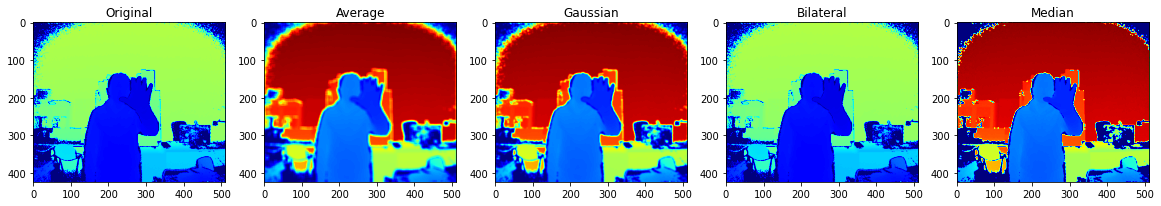

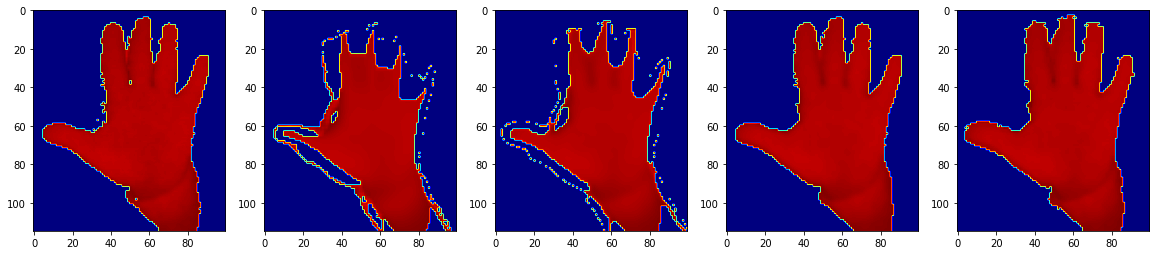

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import cv2
from matplotlib import pyplot as plt

from time import time

from google.colab import drive

# caricamento drive e immagine condivisa

drive.mount('/content/drive')

image_path = '/content/drive/Shareddrives/ImageVideoAnalysis/Datasets/Sample_images/' # immagine acquisita con il kinect, profondità

# a ciascun pixel è associato un livello, distanza pixel da sensore, 2 byte, 16 bit e NON 8
# immagine letta e convertita a float32, ciascun pixel ha un lvl flot 32
img = np.float32(cv2.imread(image_path + 'depth-frame.png', cv2.IMREAD_ANYDEPTH)) # quando andiamo a leggere l'immagine bisogna leggerla con l'ultimo parametro settato a IMREAD_ANYDEPTH, è come un -1, viene restituita l'immagine senza fare una conversione, viene letta o come una matrice di byte (1 byte) o a colori (terna)
print('Image size ', img.shape, ' Depth: ', img.dtype)

# alcuni possibili filtri

# cambiamo il valore della maschera
width = 9

imgSmooAvera = cv2.blur(img, (width,width)) # media secca, uniforme, per ciascun pixel, in un intorno (5x5), filtro lineare


imgSmooGauss = cv2.GaussianBlur(img, (width,width), 0) # blurring gaussiano, (5x5) è la maschera, e 0 è la varianza della gaussiana, filtro lineare
imgSmooBila = np.uint16(cv2.bilateralFilter(np.float32(img),5,50,0)) # filtro bilaterale (calcolo i coeff. come prodotto tra due gaussiane, una nel dominio dello spazio, e l'altra in quello delle features), filtro non lineare, tre parametri: 5 è l'ampiezza del filtro (5x5), 50 sigma spazio features, 0 sigma dominio spazio, se è 0 la chiede alla libreria per essere coerente con l'ampiezza della maschera
#imgSmooBila = np.uint16(cv2.bilateralFilter(np.float32(img),5,70,2))
imgSmooMed = cv2.medianBlur(img, 3) # non lineare, mediano


histOrig = cv2.calcHist([img],[0],None,[int((np.amax(img))/10)],[0,1+int(np.amax(img))])
tmpImg = imgSmooAvera
histAvera = cv2.calcHist([tmpImg],[0],None,[int((np.amax(tmpImg))/10)],[0,1+int(np.amax(tmpImg))])
tmpImg = imgSmooGauss
histGauss = cv2.calcHist([tmpImg],[0],None,[int((np.amax(tmpImg))/10)],[0,1+int(np.amax(tmpImg))])
tmpImg = imgSmooBila
histBila = cv2.calcHist([tmpImg],[0],None,[int((np.amax(tmpImg))/10)],[0,8000])
tmpImg = imgSmooMed
histMed = cv2.calcHist([tmpImg],[0],None,[int((np.amax(tmpImg))/10)],[0,1+int(np.amax(tmpImg))])

plt.figure(figsize=(20,12))
plt.subplot(2,5,1)
plt.imshow(img, cmap='jet')
plt.title('Original')
plt.subplot(2,5,2)
plt.imshow(imgSmooAvera, cmap='jet')
plt.title('Average')
plt.subplot(2,5,3)
plt.imshow(imgSmooGauss, cmap='jet')
plt.title('Gaussian')
plt.subplot(2,5,4)
plt.imshow(imgSmooBila, cmap='jet')
plt.title('Bilateral')
plt.subplot(2,5,5)
plt.imshow(imgSmooMed, cmap='jet')
plt.title('Median')
if 0:

    plt.subplot(2,5,6)
    plt.bar(np.arange(histOrig.shape[0]), histOrig.reshape(-1), color='blue')
    plt.xlim(1,500)
    plt.ylim(0,6000)
    plt.subplot(2,5,7)
    plt.bar(np.arange(histAvera.shape[0]), histAvera.reshape(-1), color='blue')
    plt.xlim(1,500)
    plt.ylim(0,6000)
    plt.subplot(2,5,8)
    plt.bar(np.arange(histGauss.shape[0]), histGauss.reshape(-1), color='blue')
    plt.xlim(1,500)
    plt.ylim(0,6000)
    plt.subplot(2,5,9)
    plt.bar(np.arange(histBila.shape[0]), histBila.reshape(-1), color='blue')
    plt.xlim(1,500)
    plt.ylim(0,6000)
    plt.subplot(2,5,10)
    plt.bar(np.arange(histMed.shape[0]), histMed.reshape(-1), color='blue')
    plt.xlim(1,500)
    plt.ylim(0,6000)
else:
    #img = np.float32(cv2.imread('depth-frame.png', cv2.IMREAD_ANYDEPTH))
    minHand = 720
    maxHand = 780
    r,c,h,w = (140, 225, 115, 100)
    maskOrig = cv2.inRange(img, minHand, maxHand)*np.float32(img)
    maskOrig = maskOrig[r:(r+h), c:(c+w)]
    maskAvera = cv2.inRange(imgSmooAvera, minHand, maxHand)*np.float32(imgSmooAvera)
    maskAvera = maskAvera[r:(r+h), c:(c+w)]
    maskGauss = cv2.inRange(imgSmooGauss, minHand, maxHand)*np.float32(imgSmooGauss)
    maskGauss = maskGauss[r:(r+h), c:(c+w)]
    maskBila = cv2.inRange(imgSmooBila, minHand, maxHand)*np.float32(imgSmooBila)
    maskBila = maskBila[r:(r+h), c:(c+w)]
    maskMed = cv2.inRange(imgSmooMed, minHand, maxHand)*np.float32(imgSmooMed)
    maskMed = maskMed[r:(r+h), c:(c+w)]
    plt.figure(figsize=(20,12))
    plt.subplot(2,5,6)
    plt.imshow(maskOrig, cmap='jet')
    plt.subplot(2,5,7)
    plt.imshow(maskAvera, cmap='jet')
    plt.subplot(2,5,8)
    plt.imshow(maskGauss, cmap='jet')
    plt.subplot(2,5,9)
    plt.imshow(maskBila, cmap='jet')
    plt.subplot(2,5,10)
    plt.imshow(maskMed, cmap='jet')

plt.show()

# mani, artefatti, produce non nitidezza nello stacco, questo capita sia con il filtro medio e quello gaussiamo, ma non in quelli non lineare
# artefatti che aumentano tanto più è estesa la maschera del filtro


## Image thresholding by global and adaptive threshold

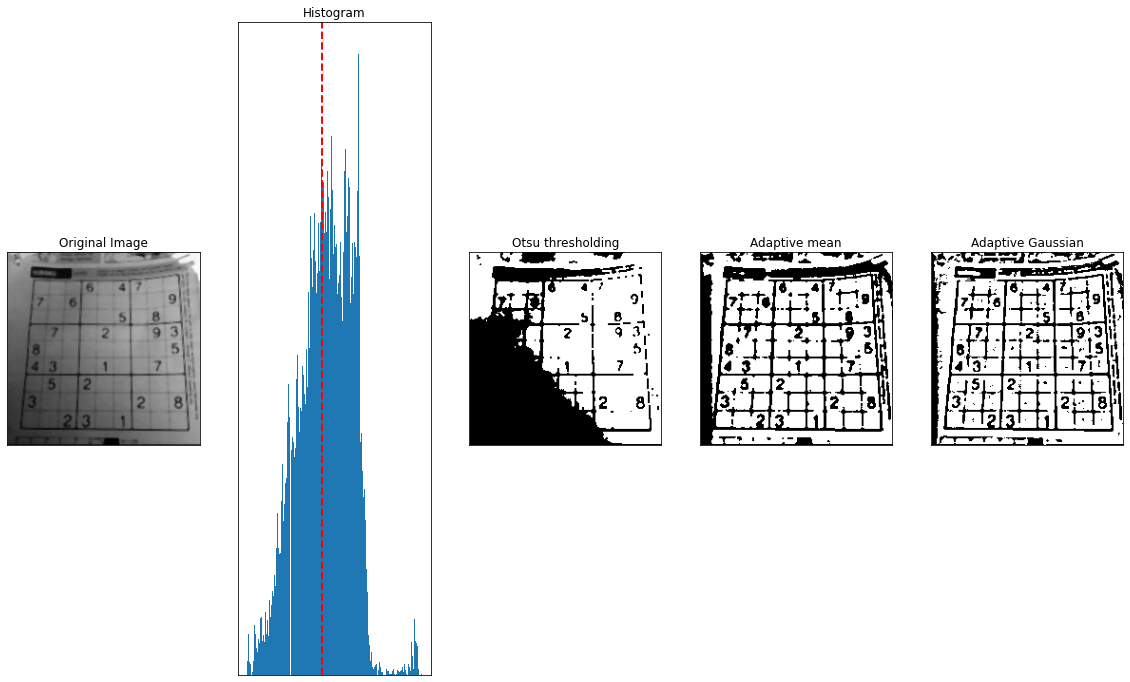

In [ ]:
# sogliatura con otsu e adattativa
# filename = 'rice.tif'
filename = 'sudoku.jpg'

img = cv2.imread(image_path+filename,0)
# Is it usefull to smooth the image before thresholding?
img = cv2.medianBlur(img,3)

if filename=='sudoku.jpg' :
    trsh, img_bw = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,27,2)
    #th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,37,6)
    th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,19,2)
else :
    trsh, img_bw = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY,41,2) # se al posto di 41 mettiamo 11, in molti punti, specie nel bg, un intorno così limitato raccoglierà solo pixel di bg
    th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY,61,2) # vengono passati l'estensione della finestra centata sul punto su cui viene calcolata la media, il secondo è una soglia aggiuntiva, se il pixel è superiore a questa soglia viene messo a 1, sennò 0
# l'estensione della maschera, per funzionare, deve essere grande abbastanza da comprenedre fg e bg, se troppo piccola non funziona bene

plt.figure(figsize=(20,12))
plt.subplot(1,5,1), plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,2), plt.hist(img.reshape(-1), 256)
plt.axvline(x=trsh, color='r', linestyle='dashed', linewidth=2)
#plt.hist(x=trsh, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,3), plt.imshow(img_bw,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,4), plt.imshow(th2,cmap = 'gray')
plt.title('Adaptive mean'), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,5), plt.imshow(th3,cmap = 'gray')
plt.title('Adaptive Gaussian'), plt.xticks([]), plt.yticks([])
plt.show()

# la media può essere calcolata come media uniforme o gaussiana
# sudoku, modelli adattivi sono più efficaci

## Image thresholding by fixed region grids

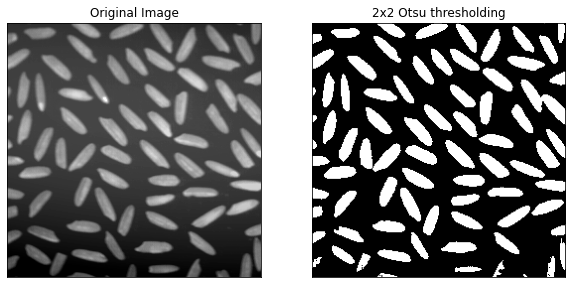

In [ ]:
# otsu con partizionamento uniforme dell'immagine, suddivide l'immagine in una griglia regolare, soglia variabile calcolata partizionando l'immagine

def variable_otsu(img, n):
    block_rows = np.uint16(img.shape[0]/n)
    block_cols = np.uint16(img.shape[1]/n)

    img_bw = np.zeros(img.shape).astype('uint8')

    for i in np.arange(0, img.shape[0], block_rows):
        for j in np.arange(0, img.shape[1], block_cols):
            max_rows = np.min([i + block_rows, img.shape[0]])
            max_cols = np.min([j + block_cols, img.shape[1]])

            trsh, img_tmp = cv2.threshold(img[i:max_rows,j:max_cols],
                                          0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            img_bw[i:max_rows,j:max_cols] = img_tmp
    return img_bw


filename = 'rice.tif'
#filename = 'sudoku.jpg'

img = cv2.imread(image_path+filename,0)
# Is it useful to smooth the image before thresholding?

grid_blocks = 2
img_out = variable_otsu(img, grid_blocks)


plt.figure(figsize=(10,6))
plt.subplot(1,2,1), plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(img_out,cmap = 'gray')
plt.title('%dx%d Otsu thresholding'%(grid_blocks,grid_blocks)), plt.xticks([]), plt.yticks([])
plt.show()

# se aumento troppo il numero di regioni dell'immagine, rischio di rovinare tutto

## Region description by geometric moments

(500, 412)
Detected 7 shapes
Moments distance matrix
[[0.    0.086 0.082 0.139 0.074 0.109]
 [0.086 0.    0.005 0.057 0.023 0.039]
 [0.082 0.005 0.    0.062 0.021 0.041]
 [0.139 0.057 0.062 0.    0.075 0.048]
 [0.074 0.023 0.021 0.075 0.    0.052]
 [0.109 0.039 0.041 0.048 0.052 0.   ]]
Hu distance matrix
[[0.    0.014 0.013 0.01  0.014 0.005]
 [0.014 0.    0.001 0.02  0.    0.017]
 [0.013 0.001 0.    0.02  0.002 0.016]
 [0.01  0.02  0.02  0.    0.021 0.01 ]
 [0.014 0.    0.002 0.021 0.    0.018]
 [0.005 0.017 0.016 0.01  0.018 0.   ]]


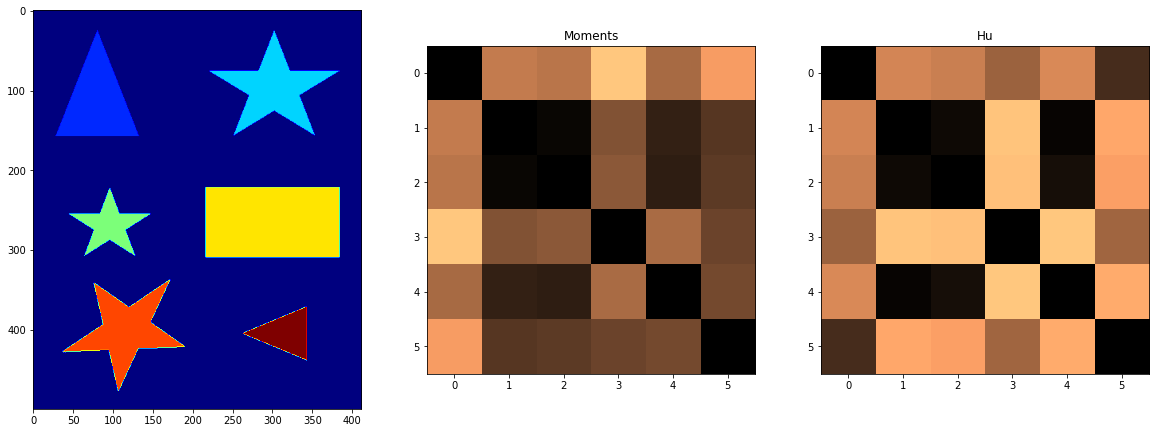

In [ ]:

img = cv2.imread(image_path+'shapes.png', 0)
print(img.shape)

regions_vs_contours = True
if regions_vs_contours: # Regions
    # Find connected components
    n, L =cv2.connectedComponents(img,connectivity=8) # data un'immagine binaria, individua le diverse regioni
    #print(L[0::20, 0::20])
    print('Detected %d shapes'%(n))

    for k in np.arange(1,n): # per ciascuna componente connessa calcola i momenti e i momenti di momenti di hu
        region_mask = (L==k)*255
        mom = cv2.moments(region_mask, binaryImage=True)
        if k == 1:
            M = np.array(list(mom.values()))
            Hu_m = np.array(cv2.HuMoments(mom)).reshape(-1)
        else:
            M = np.vstack( (M, np.array(list(mom.values())) ) )
            Hu_m = np.vstack( (Hu_m, np.array(cv2.HuMoments(mom)).reshape(-1)) )
else: # Contours
    cnt, hierarchy = cv2.findContours(img,
                                      mode=cv2.RETR_EXTERNAL,
                                      method=cv2.CHAIN_APPROX_NONE)
    num_shapes = len(cnt)
    print('Detected %d shapes'%(num_shapes))
    for k in np.arange(len(cnt)):
        mom = cv2.moments(cnt[k])
        if k == 0:
            M = np.array(list(mom.values()))
            Hu_m = np.array(cv2.HuMoments(mom)).reshape(-1)
        else:
            M = np.vstack( (M, np.array(list(mom.values())) ) )
            Hu_m = np.vstack( (Hu_m, np.array(cv2.HuMoments(mom)).reshape(-1)) )

# Moments have been computed.
# Now decide which one to use to compute the similarity matrix
#
# Retain only the moments from K1 to K2
# Spatial moments from index 0 to 9
# Central moments from index 10 to 16
# Normalized moments from index 17 to 23
K1 = 17
K2 = 24
M = M[:,K1:K2]

# Compute the distance between all pairs of shapes
# calcolo le distanze fra regioni con una relativa metrica

dist_matrix_mom = cdist(M, M, metric='euclidean') # registra per ogni coppia di regioni la loro distanza. la si visualizza come se fosse un'immagine
# gli elementi vicini sono neri, lontani non neri

print('Moments distance matrix')
print(np.around(dist_matrix_mom, decimals=3))

dist_matrix_hu = cdist(Hu_m, Hu_m, metric='euclidean')

print('Hu distance matrix')
print(np.around(dist_matrix_hu, decimals=3))

if regions_vs_contours: # Regions
    plt.figure(figsize=(20,12))
    plt.subplot(1,3,1, aspect='equal')
    plt.imshow(L, cmap='jet')
    plt.subplot(1,3,2, aspect='equal')
    plt.imshow(dist_matrix_mom, cmap='copper')
    plt.title('Moments')
    plt.subplot(1,3,3, aspect='equal')
    plt.imshow(dist_matrix_hu, cmap='copper')
    plt.title('Hu')
    plt.show()
else: # Contours
    for k in np.arange(num_shapes):
        plt.subplot(1, num_shapes+2, k+1, aspect='equal')
        plt.gca().invert_yaxis()
        plt.plot(cnt[k].reshape(-1,2)[:,0],
                 cnt[k].reshape(-1,2)[:,1], 'b-')
        plt.title('%d'%(k))
    plt.figure(figsize=(20,12))
    plt.subplot(1, num_shapes+2, num_shapes+1)
    plt.imshow(dist_matrix_mom, cmap='copper')
    plt.title('Moments')
    plt.subplot(1, num_shapes+2, num_shapes+2)
    plt.imshow(dist_matrix_hu, cmap='copper')
    plt.title('Hu')
    plt.show()

# momenti, nella prima figura abbiamo 6 forme, nessuna di questa è uguale alle altre però alcune sono uguali a parte una trasformazione (es: scala, rotazione)
# il codice estra da ciascuna di queste forme il descrittore dei momenti

# combinazione algebrica invariante a rotazione trovati da un ricercatore

# terza figura: se consideriamo la distance matrix per Hu dovrebbe evidenziare che la stella celeste è max vicina sia alla verde che alla rossa, ella riga due sono a 3 gli elementi quasi a 0 (le stelle), triangolo prima riga, max simile a se stesso è all'ultimo triangolo (ultimo quadratino nero prima riga)